[View in Colaboratory](https://colab.research.google.com/github/Hstellar/Face-recognition-Challenge/blob/master/code1.ipynb)

In [7]:
import cv2
import numpy as np
import os
from skimage import io
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [0]:
  
from sklearn.cross_validation import train_test_split
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [0]:


from skimage import color
from skimage import io
image_path = []
name="drive//My Drive//DataSet"
for file_name in os.listdir(name):
    image_path.append(os.path.join(name, file_name))

imageDataFin = []
imageLabels = []
from skimage import color
from skimage import io
    
# read face images and class labels
for img in image_path:
    imgRead = color.rgb2gray(io.imread(img))
    #imgRead = io.imread(img, as_grey=True)
    imgRead = cv2.resize(imgRead, (250, 250)) 
    
    imageDataFin.append (imgRead)
    labelRead = int(os.path.split(img)[1].split("_")[0])
#     print(labelRead)
    imageLabels.append(labelRead)

In [11]:
from sklearn.cross_validation import train_test_split
import numpy as np
# split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin), np.array(imageLabels), train_size=0.9, 
                                                    random_state = 123)

# fix the random seed for reproducibility
seed = 123
np.random.seed(seed)

# configuration
batch_size = 32
# nb_classes = 38
nb_classes =35
nb_epoch = 50
# image dimensions
img_rows, img_cols = 250, 250
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# resdhape the data matrix
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# scale the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# one-hot encoding for the class label
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


X_train shape: (346, 250, 250, 1)
346 train samples
39 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(250, 250,..., padding="valid")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 246, 246, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 246, 246, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 123, 123, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 484128)            0         
__________

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


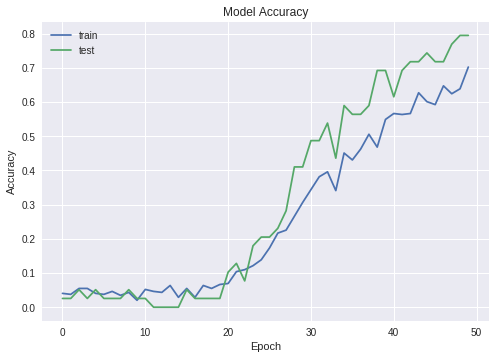


All test samples are correctly recognized.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


In [12]:

import keras
import os
from keras.utils import plot_model
import matplotlib.pyplot as plt
#os.environ["PATH"] += os.pathsep + 'C:/Users/HP/Anaconda3/envs/tf/Lib/site-packages/graphviz-2.38/release/bin'
from sklearn.metrics import classification_report
# define the convolutional neural network model
model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


# inputs = Input((250,250))
# model = Model(inputs, model)
print(model.summary())
#plot_model(model, to_file = 'C:/Users/HP/Desktop/model/model.png')


# compile the CNN model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))


# evaluation
score = model.evaluate(X_test, Y_test, verbose=1)
print('Loss:', score[0])
print('Accuracy:', score[1])

pred = model.predict(X_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(Y_test, axis=1), predicted)
print(report)

plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# find out which images are classified wrongly
predicted_classes = model.predict_classes(X_test)
correct_classified_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != Y_test)[0]
if not incorrect_classified_indices:
    print('\nAll test samples are correctly recognized.')
else:
    print('The incorrect indices are:', incorrect_classified_indices) 